Broadcasting is simply a set of rules for applying binary functions like addition, subtraction, multiplication etc. on arrays of different sizes.

The smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.

# Array with Scalar

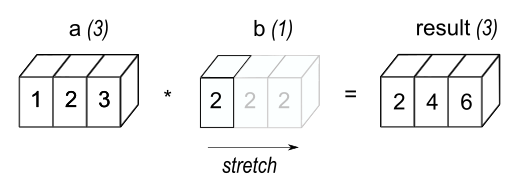

We can think of the scalar `b` being stretched during the arithmetic operation into an array with the same shape as `a`.

Note: The stretching analogy is only conceptual. NumPy is smart enough to use
the original scalar value without actually making copies so that broadcasting
operations are as memory and computationally efficient as possible.

In [ ]:
import numpy as np
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

**Another example**: Take a 4x1 vector and add 220 to it:

$= 200 + \begin{bmatrix} 2 \\ 3 \\ 4 \\ 5 \\ \end{bmatrix}$

Now python will auto expand the number 200 into 4x1 vector:

$= \begin{bmatrix} 2 \\ 3 \\ 4 \\ 5 \\ \end{bmatrix} + \begin{bmatrix} 200 \\ 200 \\ 200 \\ 200 \\ \end{bmatrix} = \begin{bmatrix} 202 \\ 203 \\ 204 \\ 205 \\ \end{bmatrix}$

We are adding 200 to every number in matrix. This is broadcasting and it works with column as well as row vectors

## Matrix with Vector

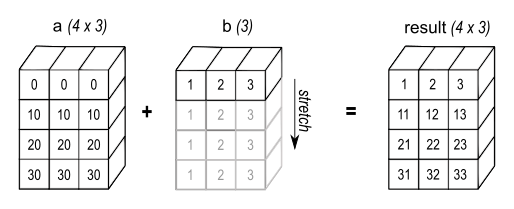

A 1D array added to a 2D array results in broadcasting if number of 1D array elements matches the number of 2D array columns.

**Broadcasting Vertically**

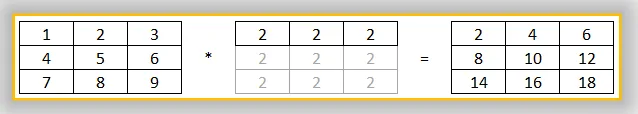

In [4]:
arr1 = np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])
arr2 = np.array([[1, 2, 3]])
print(arr1 * arr2)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


**Broadcasting Horizontally**

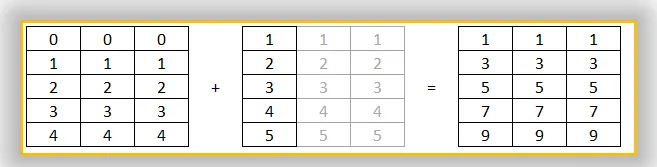

In [3]:
arr1 = np.array([[0,0,0],
                     [1,1,1],
                     [2,2,2],
                     [3,3,3],
                     [4,4,4]])
arr2 = np.array([[1],
                      [2],
                      [3],
                      [4],
                      [5]])
print(arr1 + arr2)

[[1 1 1]
 [3 3 3]
 [5 5 5]
 [7 7 7]
 [9 9 9]]


**Broadcasting Both Ways**

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [ ]:
import numpy as np
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

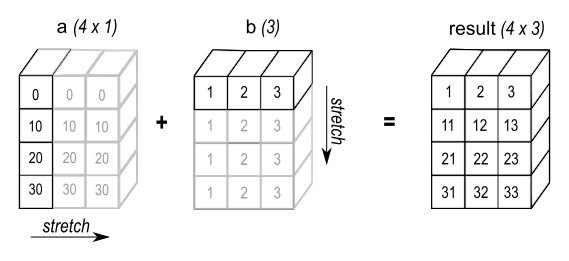

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.

Here the `newaxis` index operator inserts a new axis into a, making it a two-dimensional 4x1 array. Combining the 4x1 array with b, which has shape (3,), yields a 4x3 array.

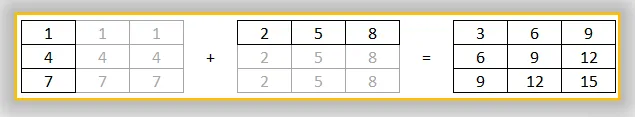

In [5]:
arr1 = np.array([[1],
                      [4],
                      [7]])
arr2 = np.array([[2, 5, 8]])
print(arr1 +arr2)

[[ 3  6  9]
 [ 6  9 12]
 [ 9 12 15]]


# General broadcasting rules

## Rule 1
If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the **trailing (i.e. rightmost)** dimension and works its way left. Two dimensions are compatible when:
* they are equal, or
* one of them is 1.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.

For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:
```text
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

```text
Observation      (1d array):      2
Codes            (2d array):  4 x 2
Diff             (2d array):  4 x 2
```

Other example:
```text
A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5
```

## Rule 2
If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.



In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:
```text
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

Some other samples
```text
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

## Rule 3
If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

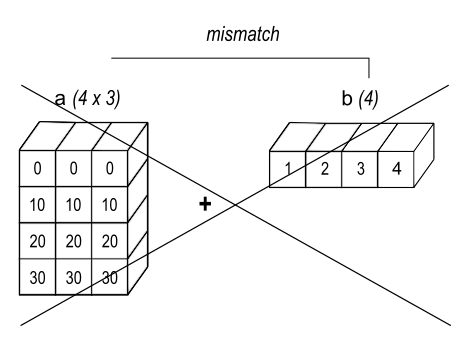

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

# Reference

https://towardsdatascience.com/numpy-broadcasting-4c4cb9dff1e7

https://numpy.org/doc/stable/user/basics.broadcasting.html?source=post_page-----e1686e3f9bbe--------------------------------
https://blog.devgenius.io/numpy-broadcasting-looking-under-the-hood-64dcfd08cc8c